<a href="https://colab.research.google.com/github/HenHimA1/A1/blob/master/AMPDs_KNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('/content/drive/My Drive/Electricity_P.csv', delimiter=",")

In [4]:
data.shape

(1051200, 24)

In [5]:
data1 = data
data1['UNIX_TS'] = [datetime.fromtimestamp(waktu) for waktu in data['UNIX_TS']]

In [6]:
data1 = data1.set_index("UNIX_TS")

In [7]:
data1 = data
data1 = data.iloc[0:600000]

In [8]:
data1.shape

(600000, 24)

In [9]:
data1.head()

,UNIX_TS,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,FRE,HPE,OFE,UTE,WOE,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE
0,2012-04-01 07:00:00,918,43,2,873,0,352,0,0,41,106,36,62,9,0,58,0,30,0,0,4,0,37,138
1,2012-04-01 07:01:00,913,43,0,870,0,354,0,0,35,107,37,61,9,0,58,0,30,0,0,4,0,37,138
2,2012-04-01 07:02:00,872,43,2,827,0,354,0,0,41,107,38,61,9,0,8,0,30,0,0,4,0,37,138
3,2012-04-01 07:03:00,872,43,2,827,0,354,0,0,40,106,37,61,9,0,7,0,30,0,0,4,0,37,142
4,2012-04-01 07:04:00,772,41,2,729,0,352,0,0,40,106,36,61,9,0,8,0,31,0,0,4,0,37,45


In [10]:
data.columns

Index(['UNIX_TS', 'WHE', 'RSE', 'GRE', 'MHE', 'B1E', 'BME', 'CWE', 'DWE',
       'EQE', 'FRE', 'HPE', 'OFE', 'UTE', 'WOE', 'B2E', 'CDE', 'DNE', 'EBE',
       'FGE', 'HTE', 'OUE', 'TVE', 'UNE'],
      dtype='object')

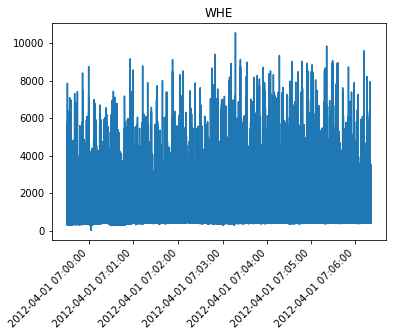

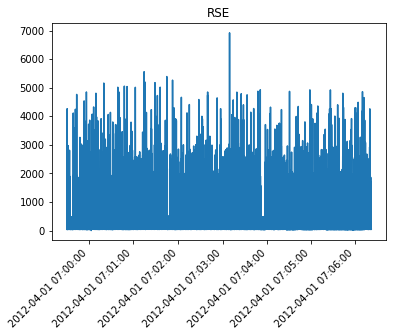

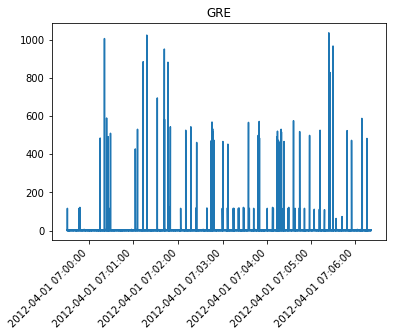

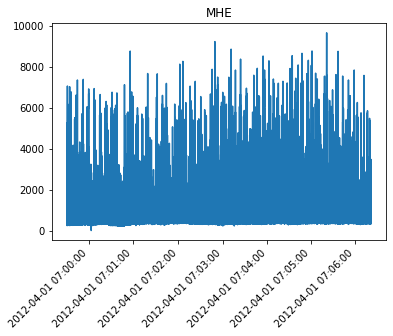

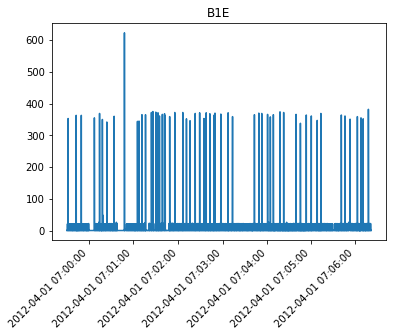

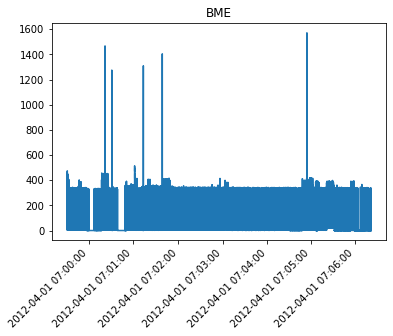

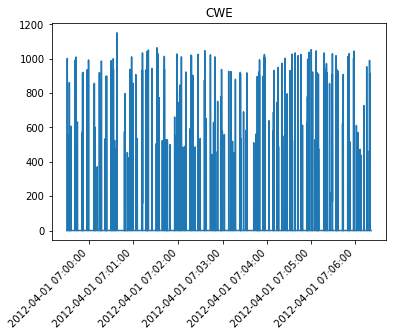

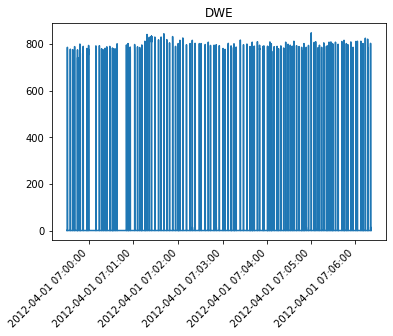

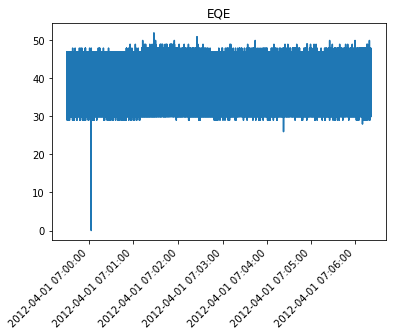

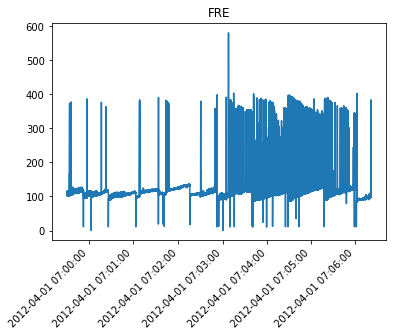

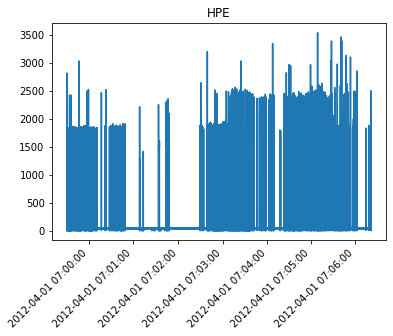

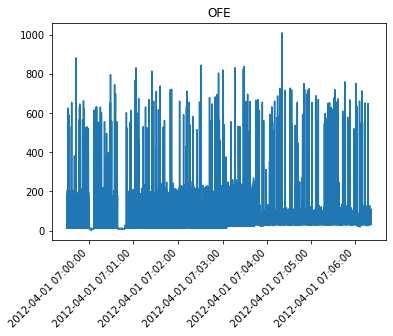

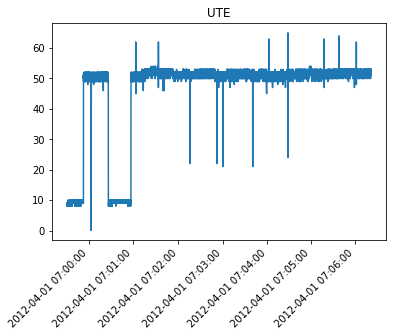

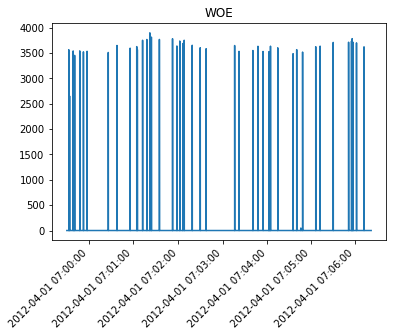

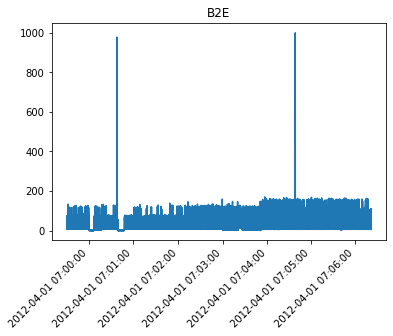

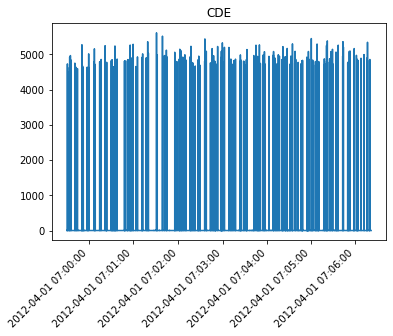

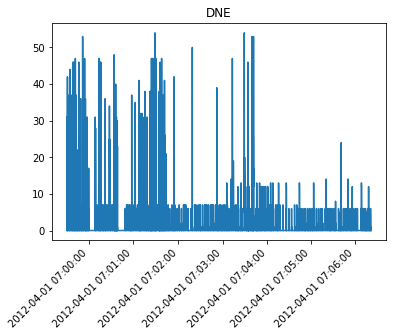

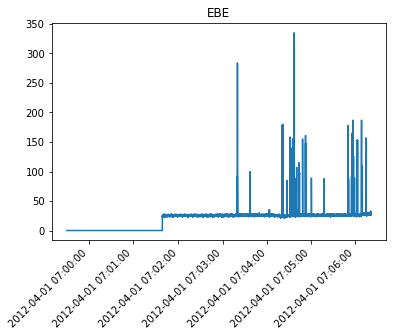

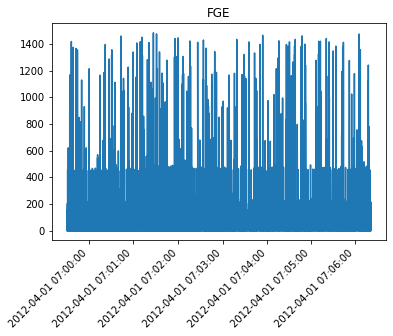

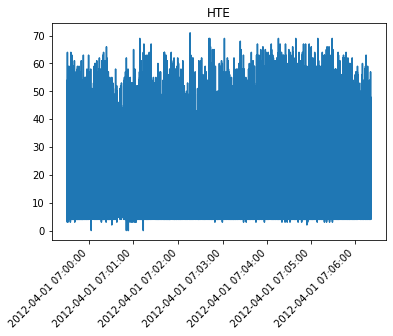

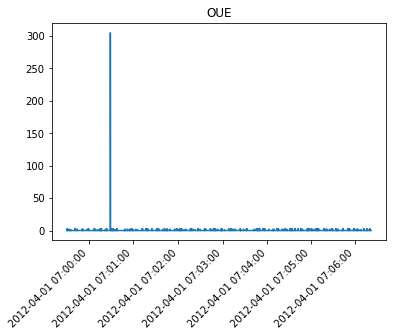

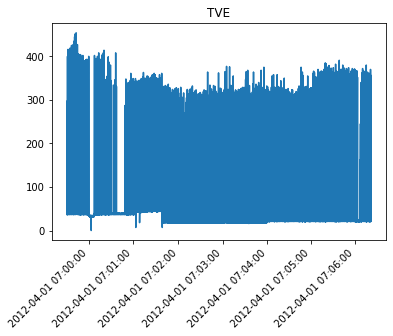

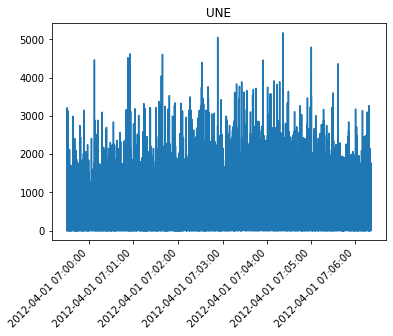

In [11]:
for i in data1.drop('UNIX_TS', axis=1):
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  plt.plot(data1['UNIX_TS'],data1[i])
  axes.set_xticklabels(data1['UNIX_TS'], rotation = 45, ha="right")
  plt.show()

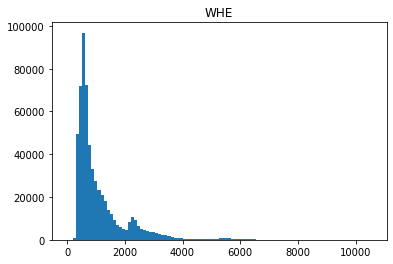

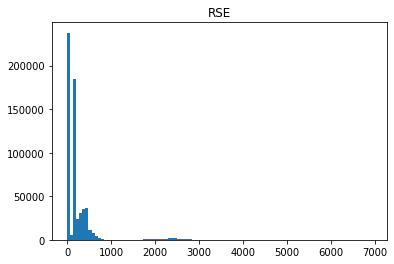

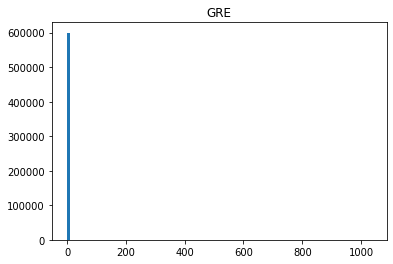

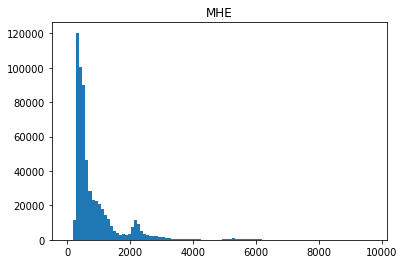

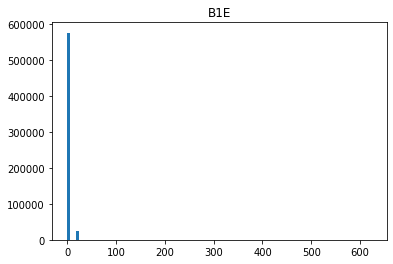

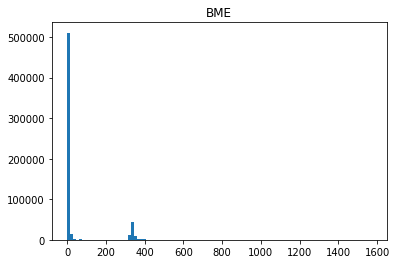

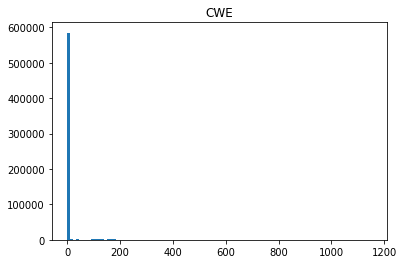

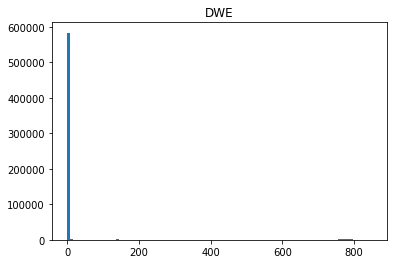

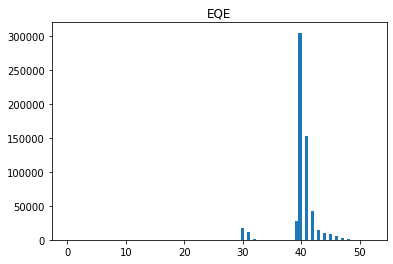

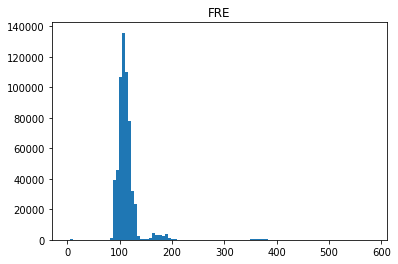

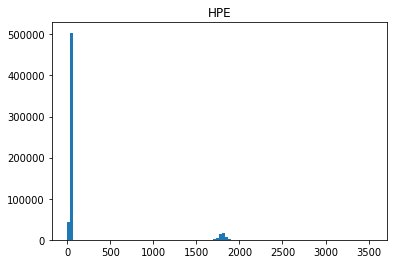

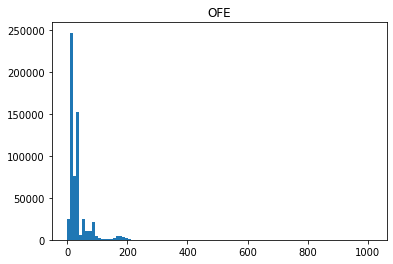

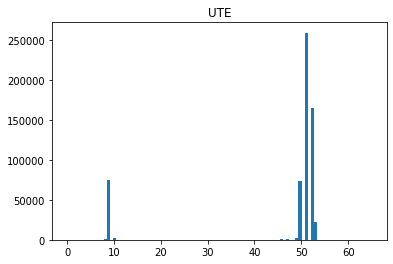

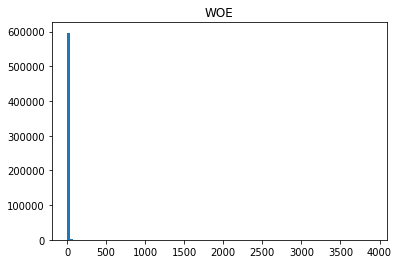

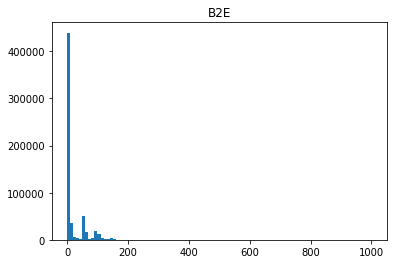

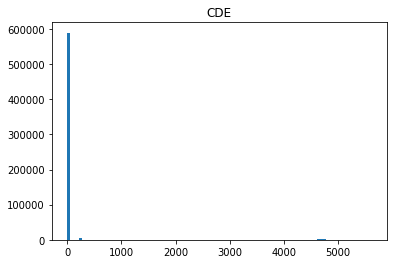

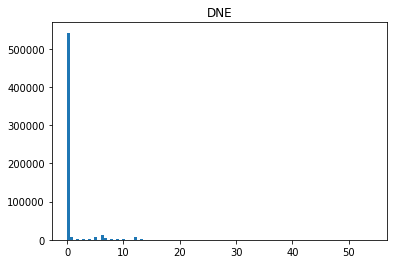

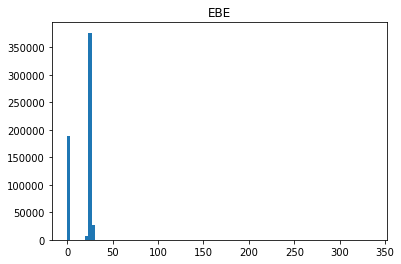

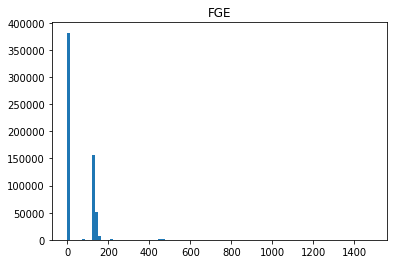

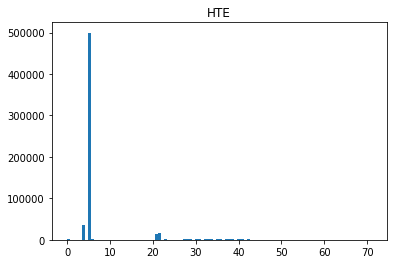

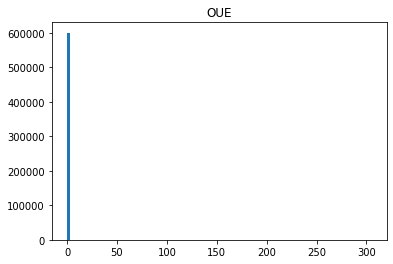

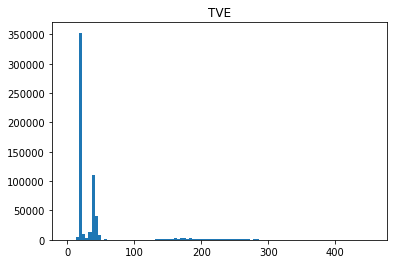

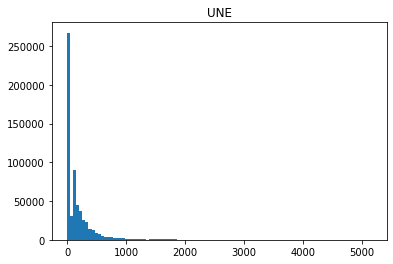

In [12]:
for i in data1.drop('UNIX_TS', axis=1):
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  axes.hist(data1[i], bins=100, range=[0,data1[i].max()])
  # axes.set_xticklabels(X_test.index, rotation = 45, ha="right")
  plt.show()

In [13]:
output_label = ["CWE", "DWE", "WOE", "CDE", "FGE", "HPE"]

In [14]:
data_proses = data1.iloc[0:162720]
X_data = data_proses[output_label].to_numpy().sum(axis=1)
X_data = pd.DataFrame(X_data, index=data_proses["UNIX_TS"])

In [15]:
data_cluster = {}
centroid = np.array([0,100]).reshape(-1,1)
for i in output_label:
  kmeans = KMeans(n_clusters=2,init=centroid).fit(data_proses[i].to_numpy().reshape(-1, 1))
  data_cluster[i] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Explicit initial center position passed: perform

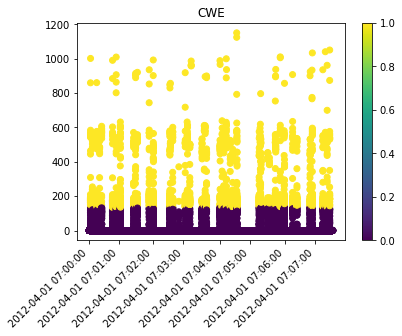

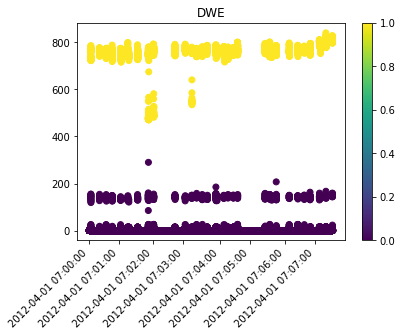

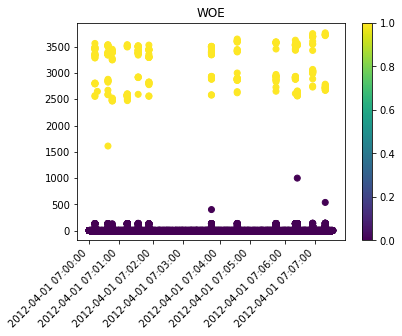

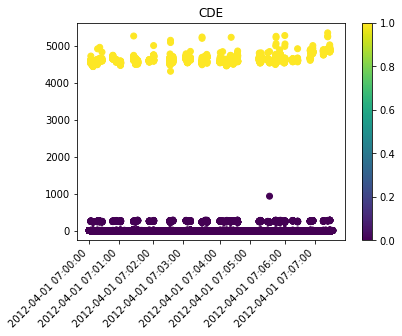

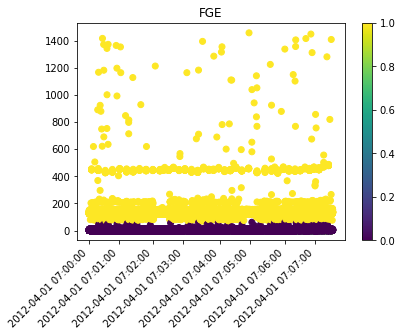

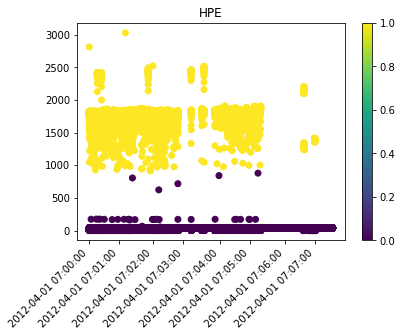

In [16]:
for i in output_label:  
  fig = plt.figure()
  axes = fig.add_subplot(111)
  plt.title(i)
  plt.scatter(data_proses["UNIX_TS"],data_proses[i],c=data_cluster[i])
  axes.set_xticklabels(data_proses['UNIX_TS'], rotation = 45, ha="right")
  plt.colorbar()
  plt.show()

In [17]:
data_cluster["UNIX_TS"] = data_proses["UNIX_TS"]
data_cluster_pd = pd.DataFrame.from_dict(data_cluster)
data_cluster_pd = data_cluster_pd.set_index("UNIX_TS")
y_data_clas = data_cluster_pd

In [18]:
y_data_reg = data_proses[output_label]
y_data_reg["UNIX_TS"] = data_proses["UNIX_TS"]
y_data_reg = y_data_reg.set_index("UNIX_TS")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
X_train = X_data.iloc[0:161280]
X_test = X_data.iloc[161280:162720]
y_train_class = y_data_clas.iloc[0:161280]
y_test_class = y_data_clas.iloc[161280:162720]
y_train_reg = y_data_reg.iloc[0:161280]
y_test_reg = y_data_reg.iloc[161280:162720]

In [20]:
X_train_reg = pd.DataFrame(y_train_class.to_dict())
X_train_reg["Power"] = X_train 

In [21]:
X_test_reg = pd.DataFrame(y_test_class.to_dict())
X_test_reg["Power"] = X_test 

In [22]:
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train_class = y_train_class.sort_index()
y_test_class = y_test_class.sort_index()
y_train_reg = y_train_reg.sort_index()
y_test_reg = y_test_reg.sort_index()
X_train_reg = X_train_reg.sort_index()
X_test_reg = X_test_reg.sort_index()

In [23]:
akurasi_class = []
akurasi_regre = []
for i in range(1,10):
  knn_class = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train_class)
  knn_regre = KNeighborsRegressor(n_neighbors=i).fit(X_train_reg,y_train_reg)
  predict_class = knn_class.predict(X_test)
  predict_regre = knn_regre.predict(X_test_reg)
  akurasi_class.append(accuracy_score(y_test_class,predict_class))
  akurasi_regre.append(mean_squared_error(y_test_reg,predict_regre))

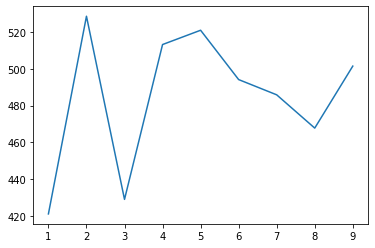

In [24]:
plt.plot(range(1,10),akurasi_regre)
plt.show()

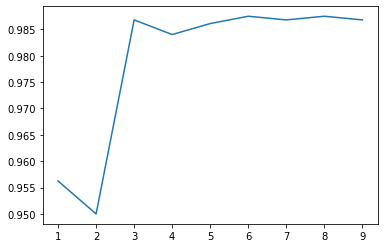

In [25]:
plt.plot(range(1,10),akurasi_class)
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors=9, metric='minkowski')
knn_regre = KNeighborsRegressor(n_neighbors=9, metric='minkowski')

In [27]:
knn.fit(X_train,y_train_class)
predict_class = knn.predict(X_test)

In [28]:
knn_regre.fit(X_train_reg,y_train_reg)
predict_regre = knn_regre.predict(X_test_reg)

In [29]:
print("Nilai Akurasi =",accuracy_score(y_test_class, predict_class))
print("Jumlah Data Prediksi Yang benar =",accuracy_score(y_test_class, predict_class, normalize=False))
print("Jumlah Data Prediksi =",y_test_class.shape[0])

Nilai Akurasi = 0.9868055555555556
Jumlah Data Prediksi Yang benar = 1421
Jumlah Data Prediksi = 1440


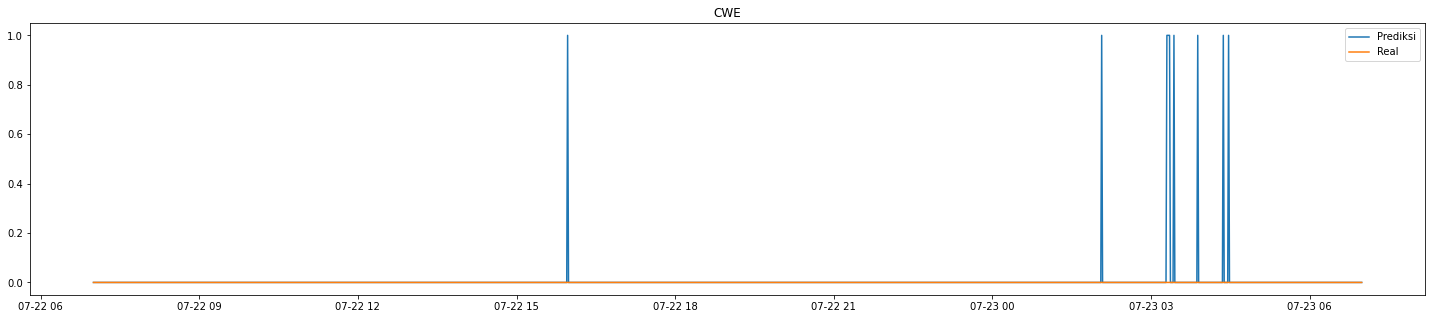

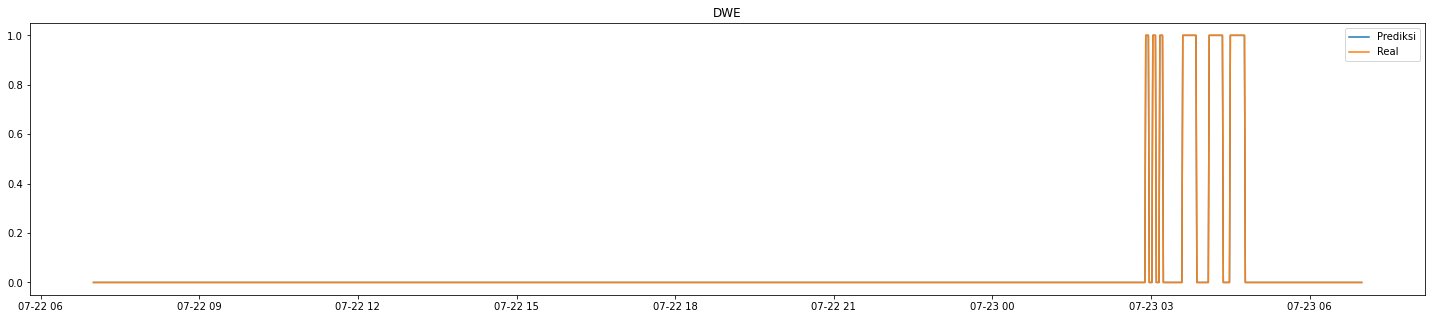

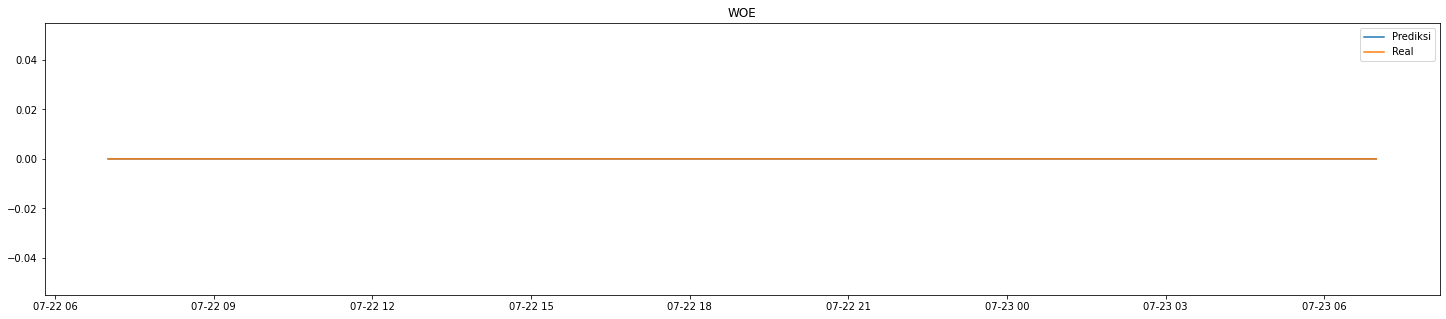

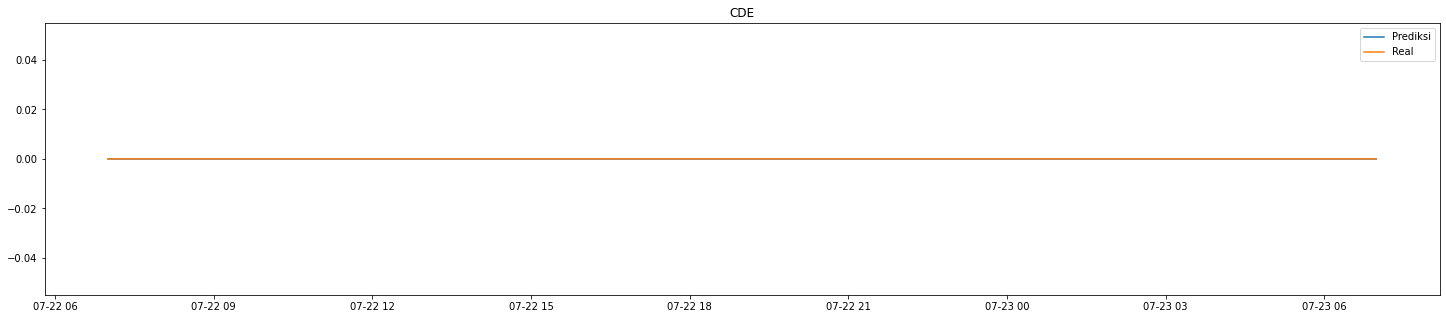

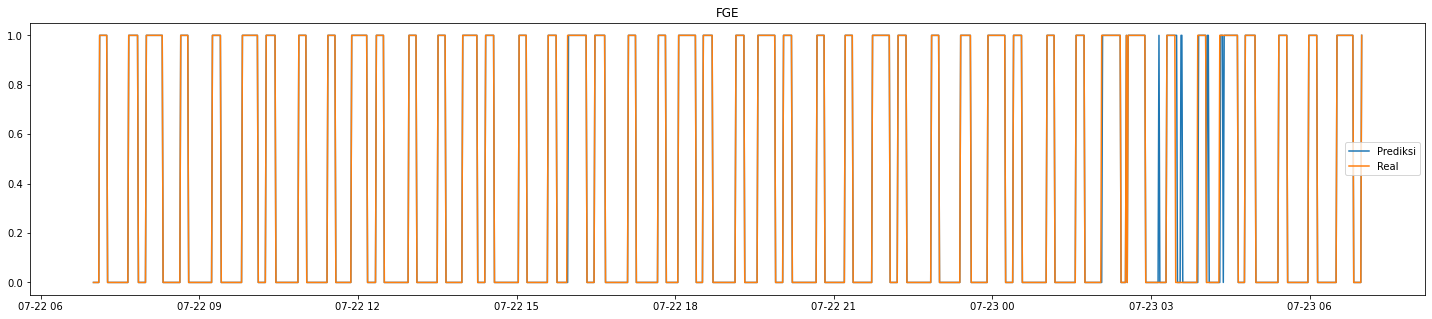

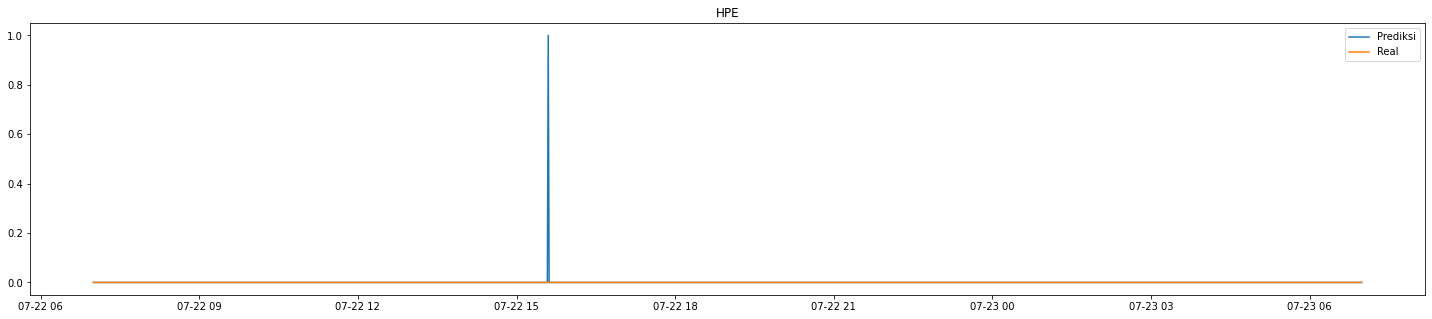

In [30]:
for i,e in enumerate(output_label):
  fig = plt.figure(figsize=(25,5))
  axes = fig.add_subplot(111)
  plt.title(e)
  plt.plot(y_test_class.index,predict_class[:,i], label="Prediksi")
  plt.plot(y_test_class.index,y_test_class[e], label="Real")
  plt.legend()
  plt.show()

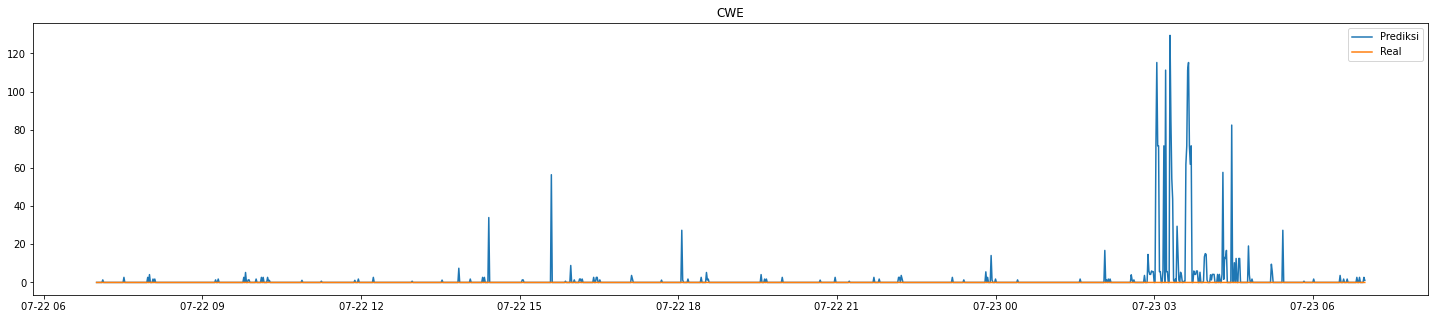

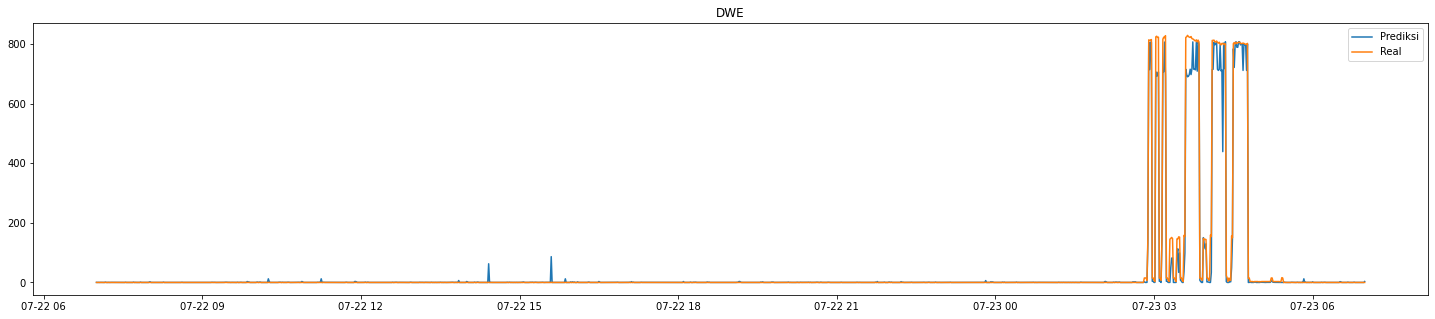

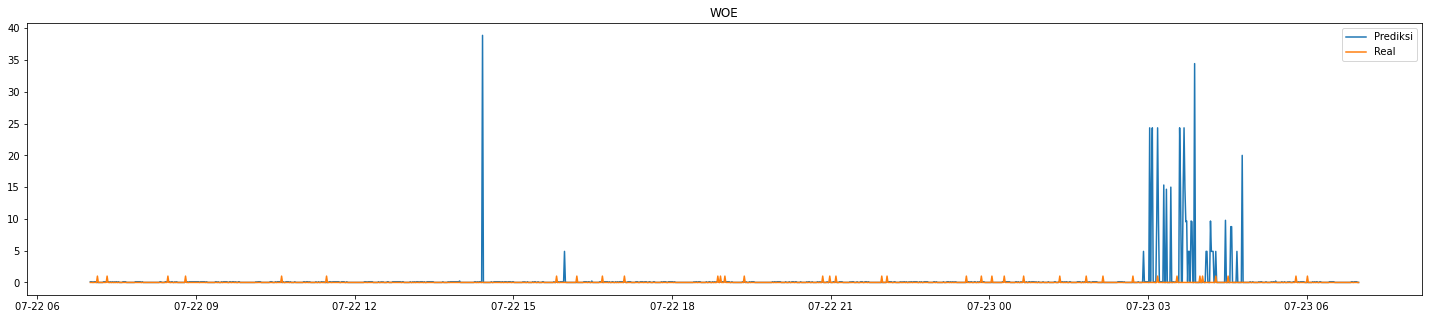

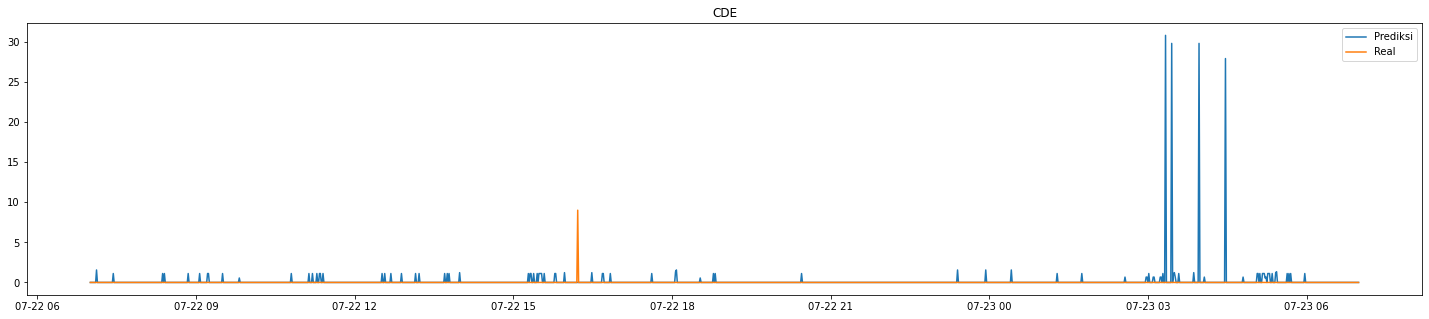

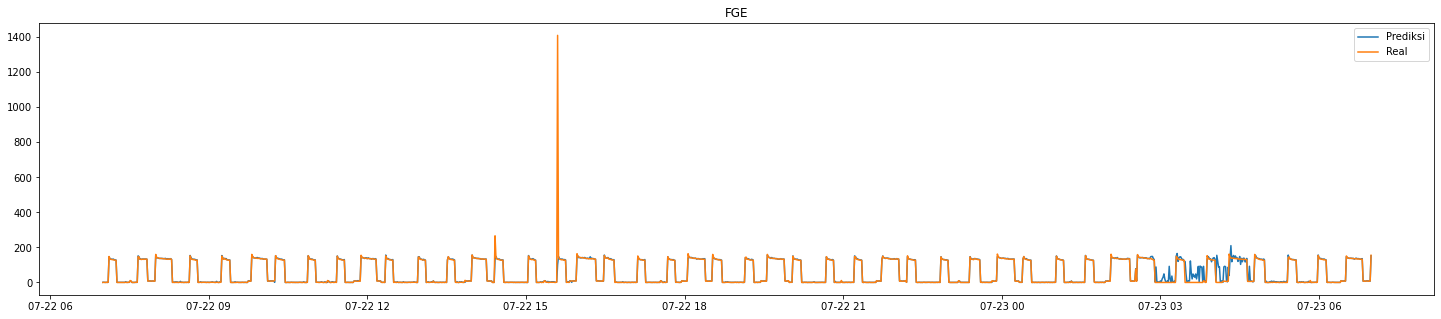

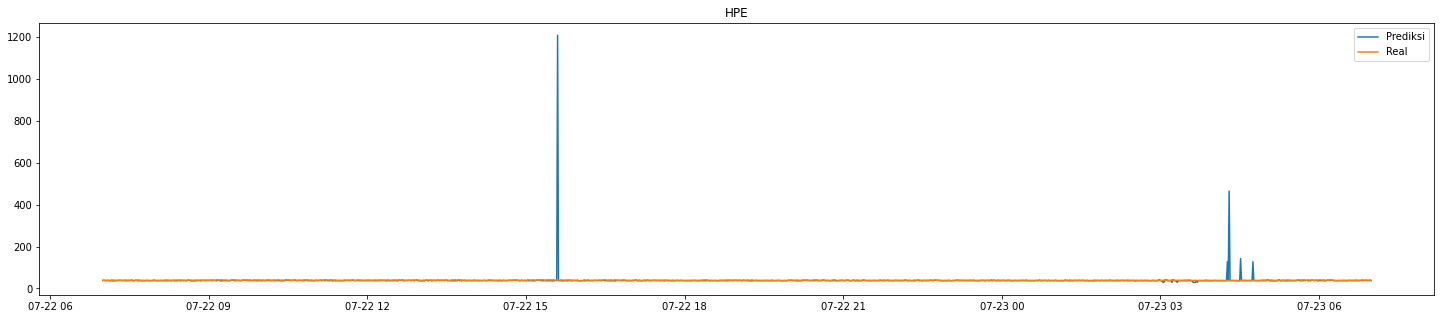

In [31]:
for i,e in enumerate(output_label):
  fig = plt.figure(figsize=(25,5))
  axes = fig.add_subplot(111)
  plt.title(e)
  plt.plot(y_test_reg.index,predict_regre[:,i],label="Prediksi")
  plt.plot(y_test_reg.index,y_test_reg[e],label="Real")
  plt.legend()
  plt.show()

In [32]:
for i,e in enumerate(output_label):
  print(e,'=',accuracy_score(y_test_class[e],predict_class[:,i]))

CWE = 0.9930555555555556
DWE = 1.0
WOE = 1.0
CDE = 1.0
FGE = 0.9916666666666667
HPE = 0.9993055555555556
